In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
timeseries_path = os.path.join('COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series')

timeseries_deaths = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Deaths.csv'))
timeseries_recovered = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Recovered.csv'))

timeseries_cases = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Confirmed.csv'))
timeseries_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,413,414,414,418,418,422,426,428,428,429
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,102,119,120,124,124,125


In [3]:
nl_timeseries_deaths = timeseries_deaths[timeseries_deaths['Country/Region'] == 'Netherlands']
nl_timeseries_recovered = timeseries_recovered[timeseries_recovered['Country/Region'] == 'Netherlands']
nl_timeseries_cases = timeseries_cases[timeseries_cases['Country/Region'] == 'Netherlands']
nl_timeseries_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
84,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,10,18,24,38,82,128,188,265,321,382


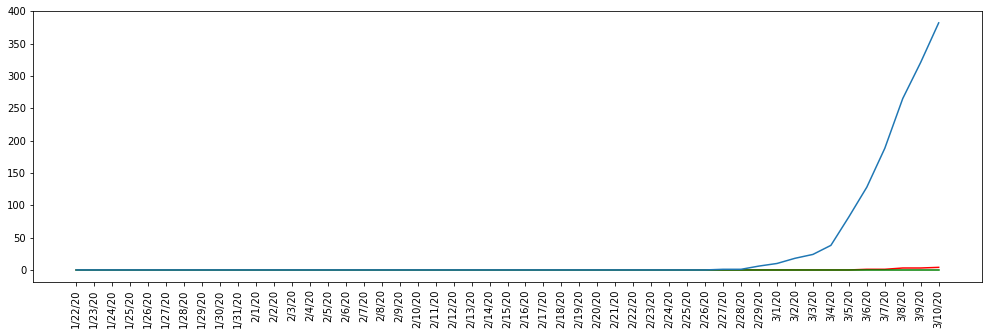

In [4]:
nl_timeseries_cases_day = nl_timeseries_cases.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).iloc[0]
nl_timeseries_deaths_day = nl_timeseries_deaths.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).iloc[0]
nl_timeseries_recovered_day = nl_timeseries_recovered.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).iloc[0]

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(nl_timeseries_deaths_day, c='r')
ax.plot(nl_timeseries_recovered_day, c='g')
ax.plot(nl_timeseries_cases_day)

plt.xticks(rotation=90)
plt.show()

/home/melvin/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


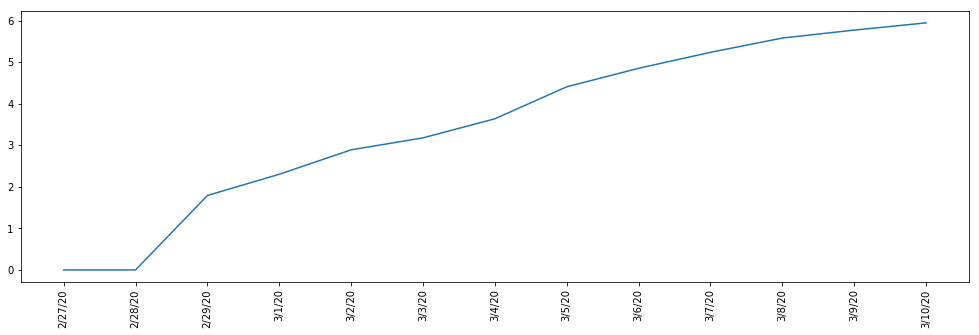

In [5]:
log_nl_timeseries_cases_day = np.log(nl_timeseries_cases_day)

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(log_nl_timeseries_cases_day)

plt.xticks(rotation=90)
plt.show()

In [6]:
n_days = 7
last_n_days = nl_timeseries_cases_day[-n_days:]

print('Amount increased by a factor of {}x in the last {} days.'.format(int(last_n_days[-1] / last_n_days[0]), n_days))
print('The current growth-factor is: {}.'.format(round(last_n_days[-1] / last_n_days[-2], 2)))
print('Current rate of death is {}% by cases.'.format(round(nl_timeseries_deaths_day.sum() / nl_timeseries_cases_day.sum(), 2)))
print('Current rate of death is {}% by recovered.'.format('?' if nl_timeseries_recovered_day.sum() == 0 else round(nl_timeseries_deaths_day.sum() / nl_timeseries_recovered_day.sum(), 2)))

Amount increased by a factor of 10x in the last 7 days.
The current growth-factor is: 1.19.
Current rate of death is 0.01% by cases.
Current rate of death is ?% by recovered.


In [7]:
from sklearn.linear_model import LinearRegression

2/29/20    1.791759
3/1/20     2.302585
3/2/20     2.890372
3/3/20     3.178054
3/4/20     3.637586
3/5/20     4.406719
3/6/20     4.852030
3/7/20     5.236442
3/8/20     5.579730
3/9/20     5.771441
3/10/20    5.945421
Name: 84, dtype: float64

In [38]:
cases_from_start = log_nl_timeseries_cases_day[log_nl_timeseries_cases_day > 0]

X = np.arange(1, len(cases_from_start) + 1, 1).reshape(-1, 1)
y = cases_from_start.values

log_res = LinearRegression()
log_res.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
from datetime import datetime, timedelta

start_datetime = datetime.strptime(cases_from_start.index[0], '%m/%d/%y')

days = []
current_day = datetime_object

for day in np.arange(1, len(cases_from_start) + 1 + 5):
    current_day = current_day + timedelta(days=1)
    days.append(current_day.strftime('%m/%d/%Y'))

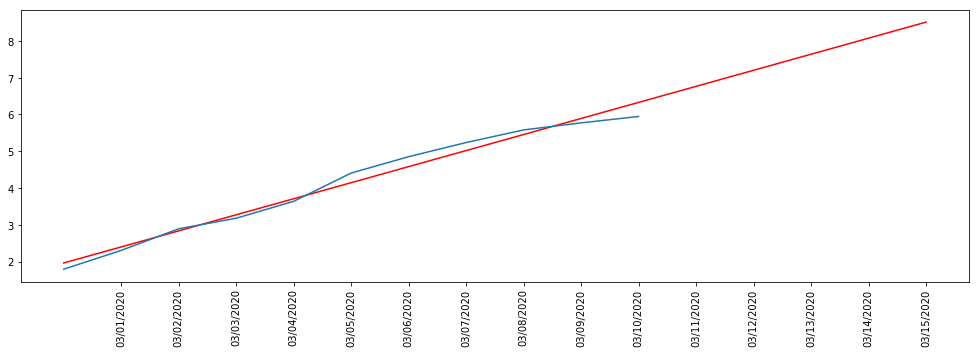

In [98]:
predictions = log_res.predict(np.arange(1, len(cases_from_start) + 1 + 5, 1).reshape(-1, 1))

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(predictions, c='r')
ax.set_xticks(np.arange(1, len(cases_from_start) + 1 + 5, 1))
ax.set_xticklabels(days)
ax.plot(cases_from_start)
ax.plot()

plt.xticks(rotation=90)
plt.show()

[ 867. 1342. 2077. 3215. 4976.]


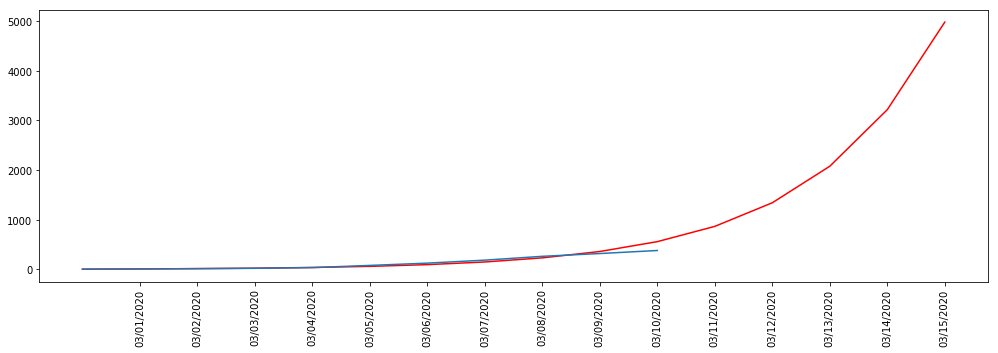

In [104]:
predictions_normal_scale = np.exp(predictions)
cases_from_start_normal = np.exp(cases_from_start)

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(predictions_normal_scale, c='r')
ax.set_xticks(np.arange(1, len(cases_from_start_normal) + 1 + 5, 1))
ax.set_xticklabels(days)
ax.plot(cases_from_start_normal)
ax.plot()

print(np.round(predictions_normal_scale[-5:]))
plt.xticks(rotation=90)
plt.show()